In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
filepath = './data/Earnings/finalconsolidatedcy22earnings_feb2023.xlsx-sheet1.csv'
data = pd.read_csv(filepath)
print(data)

                           NAME                 DEPARTMENT_NAME  \
0                Gavin,Donna M.        Boston Police Department   
1             Cassellius,Brenda                  Superintendent   
2                  Dempsey,John          Boston Fire Department   
3              Demesmin,Stanley        Boston Police Department   
4                  Smith,Sean P        Boston Police Department   
...                         ...                             ...   
23199  wheeler,Stephen clifford  Boston Cntr - Youth & Families   
23200             Harris,Gloria       BPS Office Of Budget Mgmt   
23201       Jackson,Wanita Tina        Boston Police Department   
23202              Paul,Desmond    BPS Substitute Teachers/Nurs   
23203         Robinson,Marvin L    BPS Substitute Teachers/Nurs   

                         TITLE     REGULAR RETRO         OTHER    OVERTIME  \
0      Police Lieutenant (Det)   53,226.90   NaN  1,045,845.44      463.52   
1               Superintendent  179,109

[185632.00000000003, 144883.98443283167, 118631.69689641213, 100293.31308748205, 80441.562504308, 68687.48486989504, 60027.85418679606, 51463.319099841625, 44463.11946557486, 41027.27392081594]


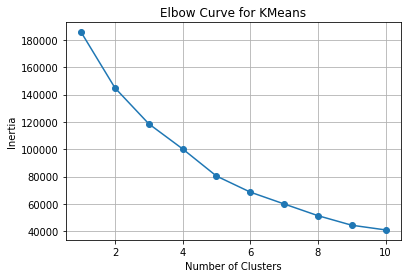

In [2]:
monetary_columns = ['REGULAR', 'RETRO', 'OTHER', 'OVERTIME', 'INJURED', 'DETAIL', 'QUINN_EDUCATION', 'TOTAL_ GROSS']
cluster_data = data[monetary_columns].fillna(0)

for column in monetary_columns:
    if data[column].dtype == 'object':  # only apply to string columns
        data[column] = data[column].str.replace(',', '').astype(float)

# Handle missing values
cluster_data = data[monetary_columns].fillna(0)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Determine optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

print(inertia)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Curve for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Going from 1 to 2 clusters, the inertia drops significantly from 185,632 to 144,884.

Continuing to 3 clusters, there's another notable drop to 118,631.

After 3 clusters, each subsequent increase in the cluster count results in smaller reductions in inertia.

Based on this pattern, the "elbow" seems to be around 3 clusters, suggesting that 3 might be an optimal number of clusters for this data.


KMeans++ & Hierarchical Clustering

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[4 4 4 ... 1 1 1]


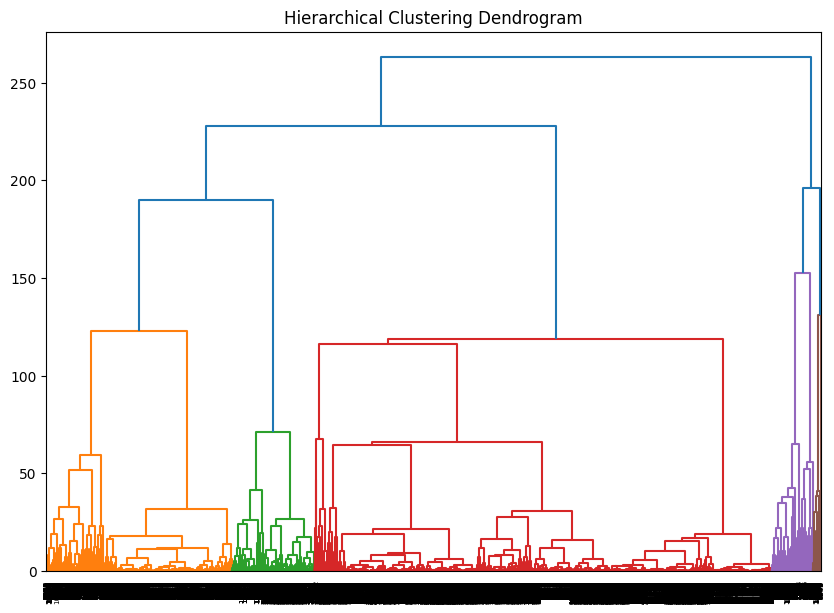

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1 2 2 ... 2 2 2]


In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# KMeans++ Clustering
kmeans_plus = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters_kmeans_plus = kmeans_plus.fit_predict(scaled_data)
print(clusters_kmeans_plus)

# Hierarchical Clustering
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# To create clusters based on the dendrogram
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(scaled_data)
print(clusters_agg)

DBScan Clustering

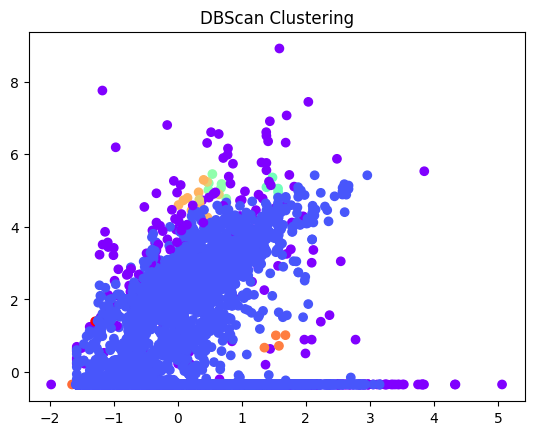

In [9]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(scaled_data)

# Visualization
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_dbscan, cmap='rainbow')
plt.title('DBScan Clustering')
plt.show()

from 0-5 (on y axis) to -1.7-3 (x axis) is the area of where the density is. the areas outside this range are noise points which don't belong to the cluster.

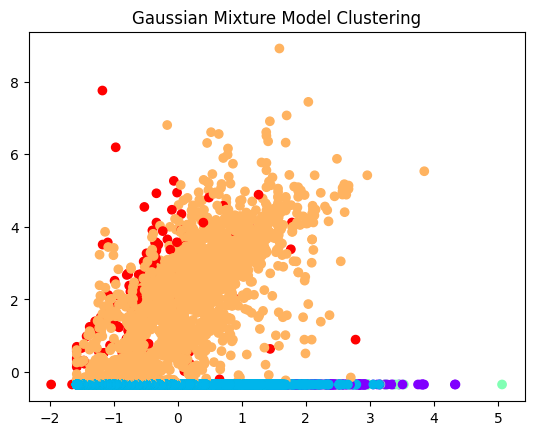

In [10]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
clusters_gmm = gmm.fit_predict(scaled_data)

# Visualization
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters_gmm, cmap='rainbow')
plt.title('Gaussian Mixture Model Clustering')
plt.show()


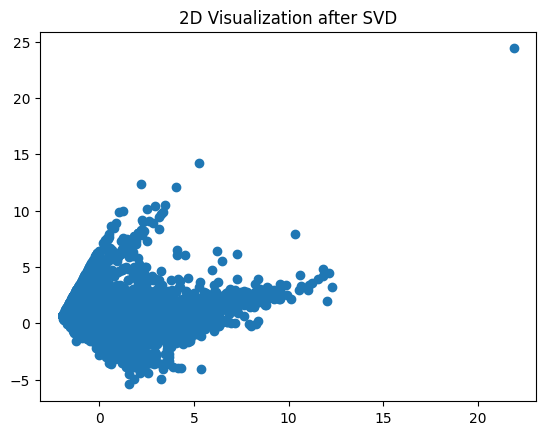

In [11]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, random_state=42)
data_svd = svd.fit_transform(scaled_data)

# Visualization
plt.scatter(data_svd[:, 0], data_svd[:, 1])
plt.title('2D Visualization after SVD')
plt.show()
